In [503]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
# Odczytaj plik 2017_jun_final.csv przy użyciu metody read_csv.

In [505]:
url_gd_poll = 'https://drive.google.com/uc?export=download&id=1bQvtiXzLnoZWNH2Qi9-rHUuxz0hELf_1'
poll_table = pd.read_csv(url_gd_poll, index_col=0)

In [506]:
# Odczytaj tabelę wynikową przy użyciu metody head.

In [507]:
print(f'Poll Table:\n{poll_table.head()}')

Poll Table:
                       Role Programming language Specialisation   \
N                                                                  
1        Junior QA engineer                  NaN       Manual QA   
2        Junior QA engineer                  NaN       Manual QA   
3         Software Engineer              C#/.NET             NaN   
4         Software Engineer           JavaScript             NaN   
5  Senior Software Engineer           JavaScript             NaN   

         Experience  Experience on current job  Salary/month  \
N                                                              
1                0.5                       0.5           400   
2  loss then 3 month         loss then 3 month           430   
3                  4                         1          2500   
4                  5                         4          2000   
5               10+                        0.5          4500   

   Изменение.зарплаты.за.12.месяцев       City              Co

In [508]:
# Zdefiniuj rozmiar tabeli przy użyciu metody shape.

In [509]:
num_rows, num_columns = poll_table.shape
print(f'Rows: {num_rows}')
print(f'Columns: {num_columns}')

Rows: 8704
Columns: 24


In [510]:
# Zdefiniuj typy wszystkich kolumn za pomocą metody dataframe.dtypes.

In [511]:
print(f'Data types:\n{poll_table.dtypes}\n')

Data types:
Role                                 object
Programming language                 object
Specialisation                       object
Experience                           object
Experience on current job            object
Salary/month                          int64
Изменение.зарплаты.за.12.месяцев      int64
City                                 object
Company size                         object
Company type                         object
Gender                               object
Age                                   int64
Education                            object
University                           object
Still student                          bool
English                              object
Subject.area                         object
Date                                 object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                                int64
Валюта              

In [512]:
# Oblicz proporcję spacji w każdej kolumnie (użyj metod isnull i sum).

In [513]:
missing_values_count = poll_table.isnull().sum()

print(f'Missing values in each column:\n{missing_values_count}\n')

Missing values in each column:
Role                                   0
Programming language                3850
Specialisation                      7219
Experience                             0
Experience on current job              0
Salary/month                           0
Изменение.зарплаты.за.12.месяцев       0
City                                   0
Company size                           0
Company type                           0
Gender                                 0
Age                                    0
Education                              0
University                          1546
Still student                          0
English                                0
Subject.area                         223
Date                                   0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls                       

In [514]:
# Usuń wszystkie kolumny ze spacjami z wyjątkiem kolumny "Język programowania".

In [515]:
column_to_hold = 'Programming language'
columns_with_spaces = [
    col for col in poll_table.columns 
    if poll_table[col].apply(lambda x: str(x).isspace() or str(x) == '').all()
]
columns_to_drop = [col for col in columns_with_spaces if col != column_to_hold]

poll_table = poll_table.drop(columns=columns_to_drop)
print(f'{poll_table}')

                          Role Programming language Specialisation   \
N                                                                     
1           Junior QA engineer                  NaN       Manual QA   
2           Junior QA engineer                  NaN       Manual QA   
3            Software Engineer              C#/.NET             NaN   
4            Software Engineer           JavaScript             NaN   
5     Senior Software Engineer           JavaScript             NaN   
...                        ...                  ...             ...   
8700               QA engineer                  NaN       Manual QA   
8701                 Marketing                  NaN             NaN   
8702  Junior Software Engineer           Ruby/Rails             NaN   
8703                 Team lead                  NaN             NaN   
8704  Senior Software Engineer                 Java             NaN   

            Experience  Experience on current job  Salary/month  \
N        

In [516]:
# Ponownie policz odsetek pustych miejsc w każdej kolumnie i upewnij się, że pozostała tylko kolumna "Język programowania"

In [517]:
missing_values_count = poll_table.isnull().sum()

print(f'Missing values in each column:\n{missing_values_count}\n')

Missing values in each column:
Role                                   0
Programming language                3850
Specialisation                      7219
Experience                             0
Experience on current job              0
Salary/month                           0
Изменение.зарплаты.за.12.месяцев       0
City                                   0
Company size                           0
Company type                           0
Gender                                 0
Age                                    0
Education                              0
University                          1546
Still student                          0
English                                0
Subject.area                         223
Date                                   0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls                       

In [518]:
# Usuń wszystkie wiersze z oryginalnej tabeli za pomocą metody dropna.

In [519]:
poll_table = poll_table.dropna(axis=1, thresh=100)
missing_values_count = poll_table.isnull().sum()
print(f'Missing values in each column:\n{missing_values_count}\n')
print(f'{poll_table}')

Missing values in each column:
Role                                   0
Programming language                3850
Specialisation                      7219
Experience                             0
Experience on current job              0
Salary/month                           0
Изменение.зарплаты.за.12.месяцев       0
City                                   0
Company size                           0
Company type                           0
Gender                                 0
Age                                    0
Education                              0
University                          1546
Still student                          0
English                                0
Subject.area                         223
Date                                   0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
cls                                 1574
dtype: int64

            

In [520]:
# Zdefiniuj nowy rozmiar tabeli za pomocą metody shape.

In [521]:
num_rows, num_columns = poll_table.shape

print(f'Rows: {num_rows}')
print(f'Columns: {num_columns}')

Rows: 8704
Columns: 23


In [522]:
# Utwórz nową tabelę python_data, która będzie zawierać tylko wiersze ze specjalistami, którzy podali język programowania Python.
# Zdefiniuj rozmiar tabeli python_data za pomocą metody shape.

In [523]:
python_data_table = poll_table[poll_table['Programming language'] == 'Python']
python_data_table = python_data_table.dropna(axis=1, how='all')
num_rows, num_columns = python_data_table.shape

print(f'Python programmer table Rows: {num_rows}')
print(f'Python programmer table Columns: {num_columns}\n')
print(f'Python programmer table: \n{python_data_table}')

Python programmer table Rows: 207
Python programmer table Columns: 22

Python programmer table: 
                          Role Programming language Experience   \
N                                                                 
13           Software Engineer               Python           1   
69           Software Engineer               Python         1.5   
88    Junior Software Engineer               Python         0.5   
115   Junior Software Engineer               Python         1.5   
144   Junior Software Engineer               Python           1   
...                        ...                  ...         ...   
8547         Software Engineer               Python           5   
8626         Software Engineer               Python           4   
8636  Senior Software Engineer               Python        10+    
8674  Junior Software Engineer               Python         0.5   
8696         Software Engineer               Python           1   

     Experience on current job 

In [524]:
# Używając metody groupby, pogrupuj według kolumny "Stanowisko".

In [525]:
python_data_table.columns = python_data_table.columns.str.strip()
python_data_table = python_data_table.sort_values(by=['Role', 'Experience on current job'],
                                                  ascending=[True, True]).reset_index(drop=True)

print(python_data_table)

                         Role Programming language Experience  \
0    Junior Software Engineer               Python       0.25   
1    Junior Software Engineer               Python          1   
2    Junior Software Engineer               Python          1   
3    Junior Software Engineer               Python        0.5   
4    Junior Software Engineer               Python       0.25   
..                        ...                  ...        ...   
202            Technical Lead               Python          2   
203            Technical Lead               Python          5   
204            Technical Lead               Python          3   
205            Technical Lead               Python       10+    
206            Technical Lead               Python          7   

    Experience on current job  Salary/month  Изменение.зарплаты.за.12.месяцев  \
0                        0.25           800                                 0   
1                        0.25           800              

In [526]:
# Utwórz nowy DataFrame, w którym dla danych pogrupowanych według kolumny "Stanowisko" wykonaj agregację danych za pomocą metody agg i znajdź minimalne i maksymalne wartości w kolumnie "Wynagrodzenie.za.miesiąc"

In [527]:
aggregated_data = python_data_table.groupby('Role')['Salary/month'].agg(max_salary='max', min_salary='min')

print(aggregated_data)

                          max_salary  min_salary
Role                                            
Junior Software Engineer        1250         100
Senior Software Engineer        9200        1300
Software Engineer               5400         500
System Architect                5000        3000
Technical Lead                  6200        1425


In [528]:
# Utwórz funkcję fill_avg_salary, która zwróci średnią miesięczną pensję. Użyj jej w metodzie apply i utwórz nową kolumnę "avg".

In [529]:
python_data_table['avg'] = python_data_table.groupby('Role')['Salary/month'].transform('mean').round(2)

print(python_data_table)

                         Role Programming language Experience  \
0    Junior Software Engineer               Python       0.25   
1    Junior Software Engineer               Python          1   
2    Junior Software Engineer               Python          1   
3    Junior Software Engineer               Python        0.5   
4    Junior Software Engineer               Python       0.25   
..                        ...                  ...        ...   
202            Technical Lead               Python          2   
203            Technical Lead               Python          5   
204            Technical Lead               Python          3   
205            Technical Lead               Python       10+    
206            Technical Lead               Python          7   

    Experience on current job  Salary/month  Изменение.зарплаты.за.12.месяцев  \
0                        0.25           800                                 0   
1                        0.25           800              

In [530]:
# Utwórz statystyki opisowe za pomocą metody describe dla nowej kolumny.

In [531]:
description = python_data_table['avg'].describe().round(2)

print(description)

count     207.00
mean     1753.94
std       996.56
min       560.84
25%       560.84
50%      1799.07
75%      1799.07
max      4000.00
Name: avg, dtype: float64


In [532]:
# Zapisz wynikową tabelę w pliku CSV.

In [533]:
output_file_name = 'Python_Dev_data.csv'
python_data_table.to_csv(output_file_name, index=False, encoding='utf-8-sig')

print(f'File saved in: {os.getcwd()}')
print(f'The table is saved in a file: {output_file_name}')

File saved in: D:\MyProjects\GoIT_DS\Homework_02
The table is saved in a file: Python_Dev_data.csv


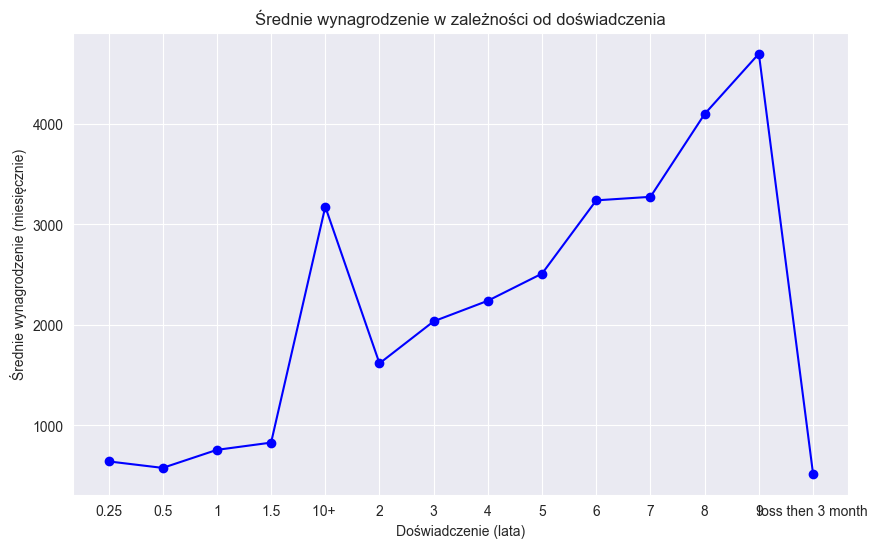

In [534]:
avg_salary_exp = python_data_table.groupby('Experience')['Salary/month'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(avg_salary_exp.index, avg_salary_exp.values, marker='o', linestyle='-', color='b')
plt.title('Średnie wynagrodzenie w zależności od doświadczenia')
plt.xlabel('Doświadczenie (lata)')
plt.ylabel('Średnie wynagrodzenie (miesięcznie)')
plt.grid(True)
plt.show()

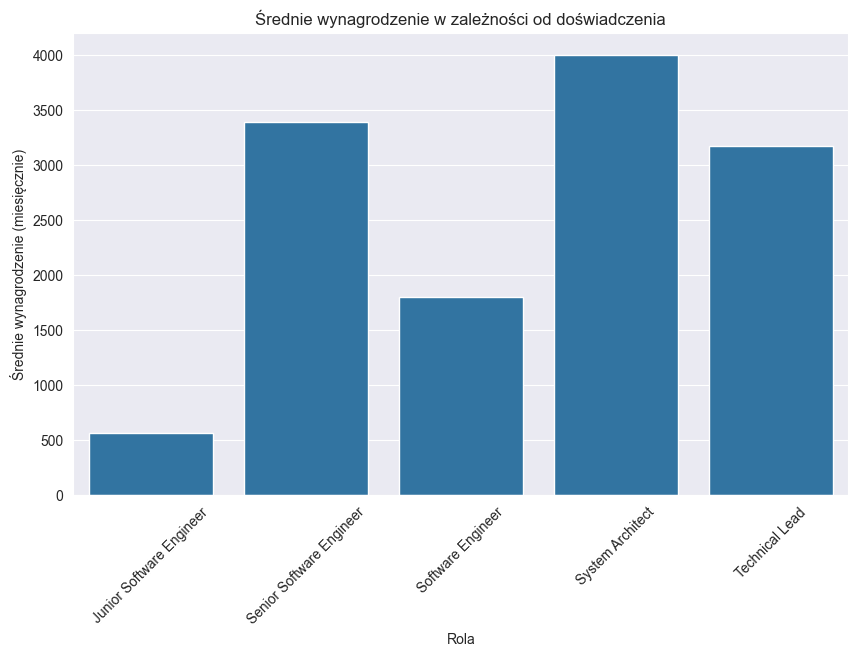

In [535]:
avg_salary_role = python_data_table.groupby('Role')['Salary/month'].mean().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_role.index, y=avg_salary_role.values)
plt.title('Średnie wynagrodzenie w zależności od doświadczenia')
plt.xlabel('Rola')
plt.ylabel('Średnie wynagrodzenie (miesięcznie)')
plt.xticks(rotation=45)
plt.show()

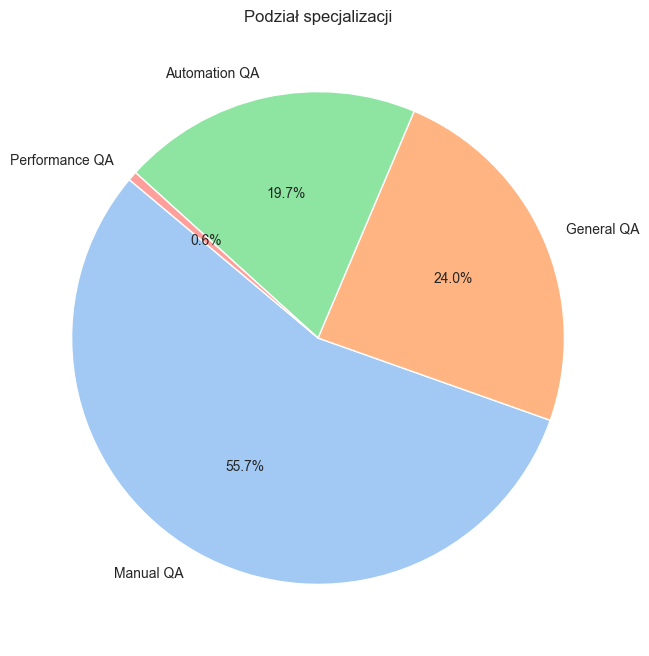

In [536]:
poll_table.columns = poll_table.columns.str.strip()
spec_count = poll_table['Specialisation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(spec_count, labels=spec_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Podział specjalizacji')
plt.show()